In [1]:
from enum import Enum, auto
import random
import matplotlib.pyplot as plt

NUM_SIMULATIONS = 1000
NUM_ROUNDS = 1000
STARTING_MONI = 1000

In [13]:
class Colors(Enum):
    RED = auto()
    BLACK = auto()
    GREEN = auto()


class BettingStrategy(Enum):
    CONSTANT_RED_BLACK = auto()
    DOUBLING_RED_BLACK = auto()
    CONSTANT_GREEN = auto()
    RANDOM_BETTING = auto()


def constant_red_black(moni: int, rolls: list[Colors]) -> int:
    for roll in rolls:
        if moni < 10:
            return moni
        moni -= 10
        if roll == Colors.RED:
            moni += 20
    return moni


def doubling_red_black(moni: int, rolls: list[Colors]) -> int:
    bet = 10
    for roll in rolls:
        if moni < bet:
            bet = moni
        moni -= bet
        if roll == Colors.RED:
            moni += 2 * bet
        else:
            bet *= 2
    return moni


def constant_green(moni: int, rolls: list[Colors]) -> int:
    for roll in rolls:
        if moni < 10:
            return moni
        moni -= 10
        if roll == Colors.GREEN:
            moni += 180
    return moni


def random_betting(moni: int, rolls: list[Colors]) -> int:
    for roll in rolls:
        if moni < 10:
            return moni
        moni -= 10
        if roll == random.choice([Colors.RED, Colors.BLACK, Colors.GREEN]):
            if roll == Colors.GREEN:
                moni += 180
            else:
                moni += 20
    return moni


def simulate(x: int, betting_strategy: BettingStrategy) -> None:
    moni = STARTING_MONI

    rolls = random.choices(
        population=[Colors.RED, Colors.BLACK, Colors.GREEN],
        weights=[x / 100, x / 100, (100 - 2 * x) / 100],
        k=NUM_ROUNDS,
    )

    match betting_strategy:
        case BettingStrategy.CONSTANT_RED_BLACK:
            moni = constant_red_black(moni, rolls)
        case BettingStrategy.DOUBLING_RED_BLACK:
            moni = doubling_red_black(moni, rolls)
        case BettingStrategy.CONSTANT_GREEN:
            moni = constant_green(moni, rolls)
        case BettingStrategy.RANDOM_BETTING:
            moni = random_betting(moni, rolls)
    return moni

returns = lambda x : [(v - STARTING_MONI) for v in x]
avg = lambda x : sum(x)/len(x)


In [3]:
constant_red_black_vals = []
doubling_red_black_vals = []
constant_green_vals = []
random_betting_vals = []

constant_red_black_ruin = []
doubling_red_black_ruin = []
constant_green_ruin = []
random_betting_ruin = []



for x in range(1, 50):
    print(x, end=" ")
    constant_red_black_simulations = [simulate(x, BettingStrategy.CONSTANT_RED_BLACK) for _ in range(NUM_SIMULATIONS)]
    constant_red_black_vals.append(avg(constant_red_black_simulations))
    constant_red_black_ruin.append(100*constant_red_black_simulations.count(0)/NUM_SIMULATIONS)

    doubling_red_black_simulations = [simulate(x, BettingStrategy.DOUBLING_RED_BLACK) for _ in range(NUM_SIMULATIONS)]
    doubling_red_black_vals.append(avg(doubling_red_black_simulations))
    doubling_red_black_ruin.append(100*doubling_red_black_simulations.count(0)/NUM_SIMULATIONS)

    constant_green_simulations = [simulate(x, BettingStrategy.CONSTANT_GREEN) for _ in range(NUM_SIMULATIONS)]
    constant_green_vals.append(avg(constant_green_simulations))
    constant_green_ruin.append(100*constant_green_vals.count(0)/NUM_SIMULATIONS)

    random_betting_simulations = [simulate(x, BettingStrategy.RANDOM_BETTING) for _ in range(NUM_SIMULATIONS)]
    random_betting_vals.append(avg(random_betting_simulations))
    random_betting_ruin.append(100*random_betting_vals.count(0)/NUM_SIMULATIONS)
    

1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 

In [20]:
def plot(a: list[int], b: list[float]) -> None:
    plt.figure(figsize=(10, 5))
    
    plt.subplot(1, 2, 1)
    plt.plot(range(1, 50), returns(a))
    plt.title('Expected Return vs x')
    plt.xlabel('x')
    plt.ylabel('Expected Return')
    
    plt.subplot(1, 2, 2)
    plt.plot(range(1, 50), b)
    plt.title('Risk of Ruin vs x')
    plt.xlabel('x')
    plt.ylabel('Risk of Ruin')
    
    plt.tight_layout()
    plt.show()

CONSTANT RED BLACK


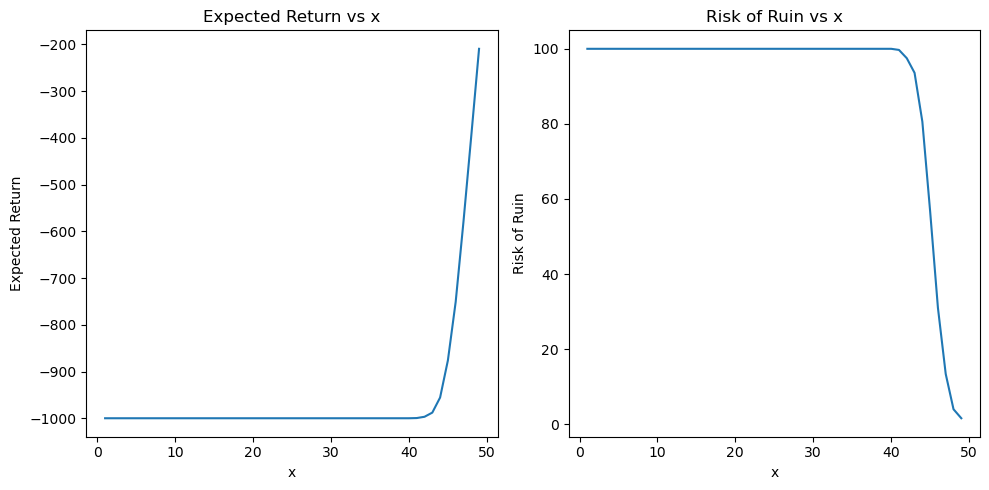

In [5]:
print("CONSTANT RED BLACK")
plot(constant_red_black_vals, constant_red_black_ruin)

DOUBLING RED BLACK


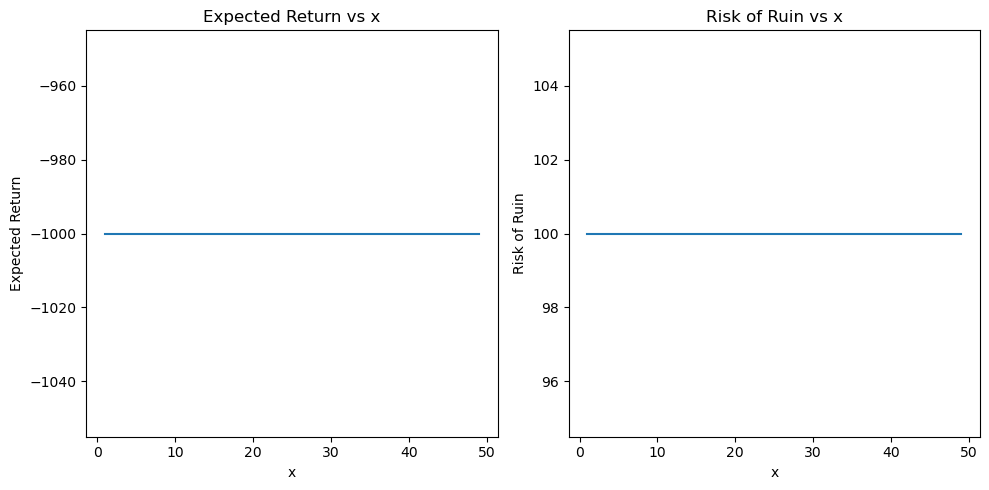

In [6]:
print("DOUBLING RED BLACK")
plot(doubling_red_black_vals, doubling_red_black_ruin)

CONSTANT GREEN


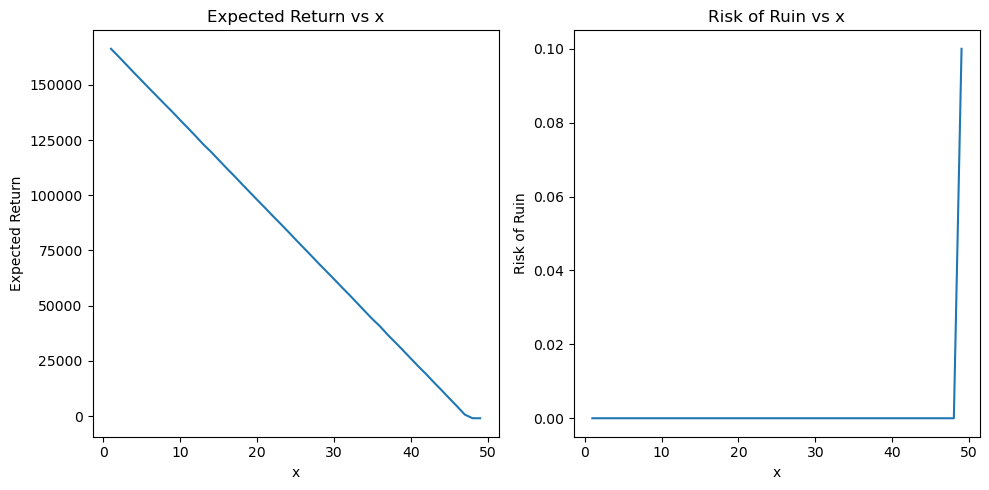

In [7]:
print("CONSTANT GREEN")
plot(constant_green_vals, constant_green_ruin)

RANDOM BETTING


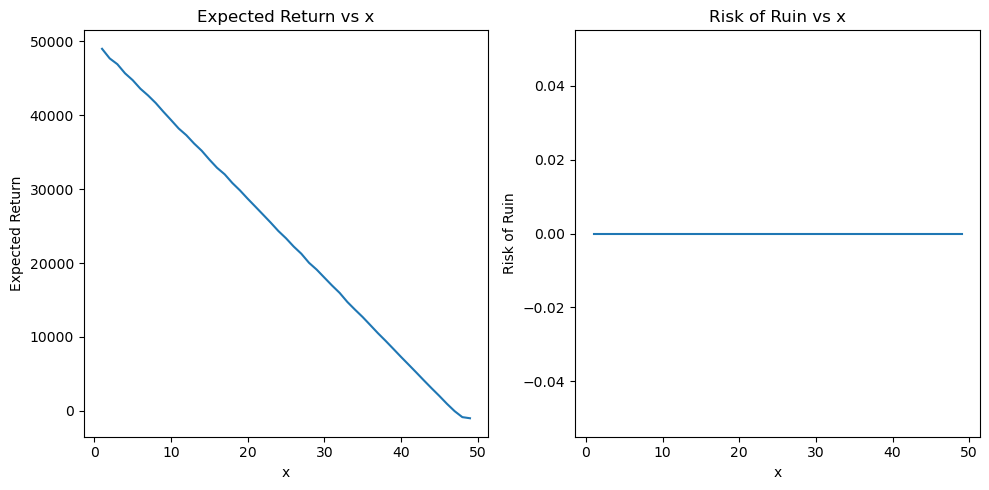

In [22]:
print("RANDOM BETTING")
plot(random_betting_vals, random_betting_ruin)

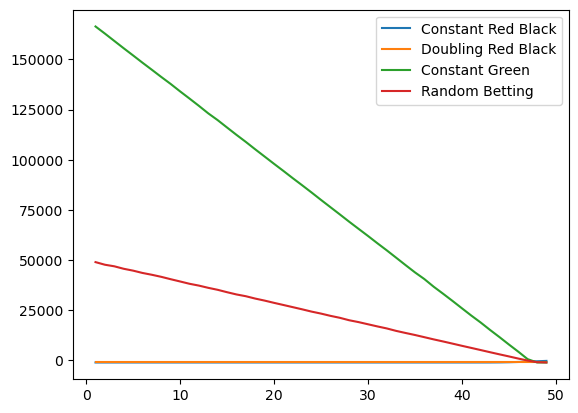

In [9]:
plt.plot(range(1, 50), returns(constant_red_black_vals), label="Constant Red Black")
plt.plot(range(1, 50), returns(doubling_red_black_vals), label="Doubling Red Black")
plt.plot(range(1, 50), returns(constant_green_vals), label="Constant Green")
plt.plot(range(1, 50), returns(random_betting_vals), label="Random Betting")
plt.legend()
plt.show()